In [66]:
from sklearn.datasets import make_classification, samples_generator, make_swiss_roll, make_circles
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
plt.style.use('ggplot')
from time import time
import numpy as np
import pandas as pd

In [2]:
from sklearn import manifold
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding, Isomap
from sklearn.decomposition import PCA, KernelPCA, NMF, TruncatedSVD

In [3]:
from sklearn.cluster import KMeans

PCA: 0.067 sec
Accuracy kmeans PCA: 0.95
LLE kmeans: 0.86
Isomap: 0.015 sec
Isomap kmeans: 0.86
MDS: 1.6 sec
MDS kmeans: 0.93
t-SNE: 3 sec
t-SNE kmeans: 0.83
KernelPCA: 0.0026 sec
KernelPCA kmeans: 0.94


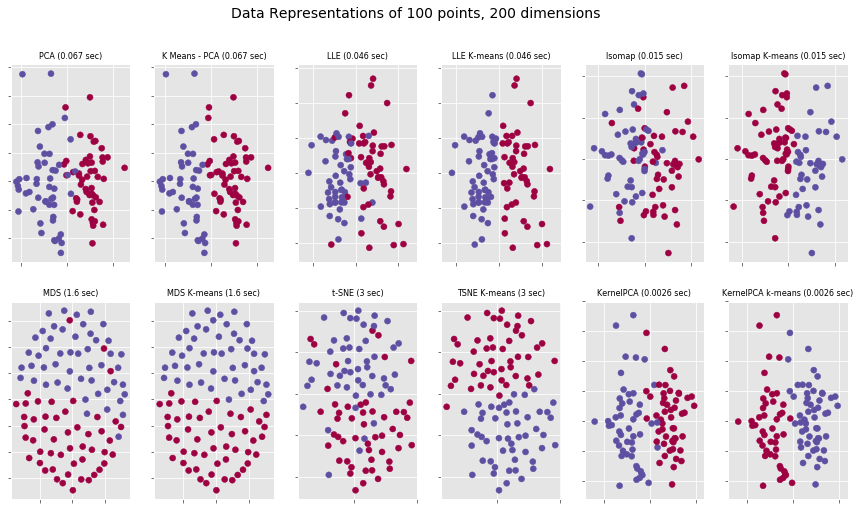

In [201]:
n_points = 1000
n_neighbors = 10
n_components = 2

X, color = make_classification(100, 200, 2, 0, 0, 2, n_clusters_per_class=1, class_sep=2, random_state=777, shuffle=True)
#X, color =samples_generator.make_s_curve(1000, random_state=777)



#X[:, 1] -= 1
#X[:, 1] *= 1.5
#X[:, 2] *= 0.5



fig = plt.figure(figsize=(15, 8))
plt.suptitle("Data Representations of %i points, %i dimensions"
             % (100, 200), fontsize=14)



#methods = ['standard']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

t0 = time()
pca = PCA(2).fit(X)
Y = pca.transform(X)
i = KMeans(2).fit(Y)
t1 = time()
print("%s: %.2g sec" % ('PCA', t1 - t0))

ax = fig.add_subplot(261)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(262)
#plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('Accuracy kmeans PCA: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("K Means - PCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(X)
t1 = time()


ax = fig.add_subplot(263)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LLE', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(264)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('LLE kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('LLE K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(265)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(266)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('Isomap kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('Isomap K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=5000, n_init=4)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(267)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(268)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('MDS kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('MDS K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
tsne = manifold.TSNE(n_components=n_components, n_iter=5000, init='pca', perplexity=10, random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 6, 9)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(2, 6, 10)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('t-SNE kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('TSNE K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
kpca = KernelPCA(n_components=n_components, kernel='rbf', random_state=0)
Y = kpca.fit_transform(X)
t1 = time()
print("KernelPCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 6, 11)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("KernelPCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


ax = fig.add_subplot(2, 6, 12)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('KernelPCA kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('KernelPCA k-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [65]:
## Real data

In [175]:
df = pd.read_csv('/Users/jannes/Downloads/breast-cancer.csv', index_col=0, header=0).iloc[:,:-1]

In [212]:
df.shape

(569, 31)

In [161]:
df_wine = pd.read_table('/Users/jannes/Downloads/winedata.txt', sep=' ', index_col=0, header=0)

In [162]:
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [203]:
X = np.array(df[[i for i in df.columns if i not in 'diagnosis']])

In [204]:
color = np.array(df['diagnosis'])

In [209]:
color = np.array([1 if i=='M' else 0 for i in color])

PCA: 0.021 sec
Accuracy kmeans PCA: 0.8541300527240774
LLE kmeans: 0.5289982425307557
Isomap: 0.15 sec
Isomap kmeans: 0.8523725834797891
MDS: 47 sec
MDS kmeans: 0.8541300527240774
t-SNE: 87 sec
t-SNE kmeans: 0.8541300527240774
KernelPCA: 0.032 sec
KernelPCA kmeans: 0.6239015817223199


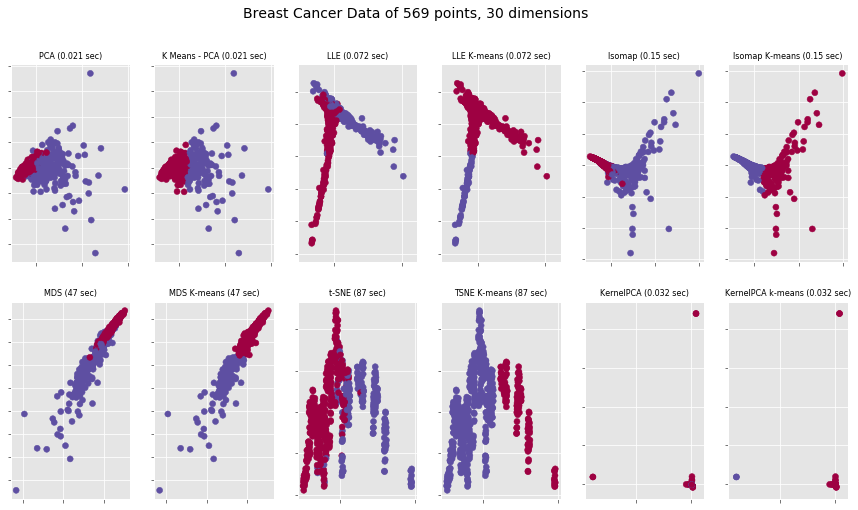

In [213]:
n_points = 1000
n_neighbors = 10
n_components = 2

#X, color = make_classification(100, 200, 2, 0, 0, 2, n_clusters_per_class=1, class_sep=2, random_state=777, shuffle=True)
#X, color =samples_generator.make_s_curve(1000, random_state=777)



#X[:, 1] -= 1
#X[:, 1] *= 1.5
#X[:, 2] *= 0.5



fig = plt.figure(figsize=(15, 8))
plt.suptitle("Breast Cancer Data of %i points, %i dimensions"
             % (569, 30), fontsize=14)



#methods = ['standard']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

t0 = time()
pca = PCA(2).fit(X)
Y = pca.transform(X)
i = KMeans(2).fit(Y)
t1 = time()
print("%s: %.2g sec" % ('PCA', t1 - t0))

ax = fig.add_subplot(261)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(262)
#plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('Accuracy kmeans PCA: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("K Means - PCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(X)
t1 = time()


ax = fig.add_subplot(263)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LLE', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(264)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('LLE kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('LLE K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(265)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(266)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('Isomap kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('Isomap K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=5000, n_init=4)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(267)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(268)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('MDS kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('MDS K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
tsne = manifold.TSNE(n_components=n_components, n_iter=5000, init='pca', perplexity=10, random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 6, 9)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(2, 6, 10)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('t-SNE kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('TSNE K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
kpca = KernelPCA(n_components=n_components, kernel='rbf', random_state=0)
Y = kpca.fit_transform(X)
t1 = time()
print("KernelPCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 6, 11)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("KernelPCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


ax = fig.add_subplot(2, 6, 12)
i = KMeans(2).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('KernelPCA kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('KernelPCA k-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [214]:
X = np.array(df_wine[[i for i in df_wine.columns if i!='class']])

In [215]:
color = np.array(df_wine['class'])

PCA: 0.047 sec
Accuracy kmeans PCA: 0.8876404494382022
LLE kmeans: 0.9943820224719101
Isomap: 0.015 sec
Isomap kmeans: 0.9943820224719101
MDS: 1.3 sec
MDS kmeans: 0.6292134831460674
t-SNE: 7.6 sec
t-SNE kmeans: 0.550561797752809
KernelPCA: 0.0037 sec
KernelPCA kmeans: 0.9887640449438202


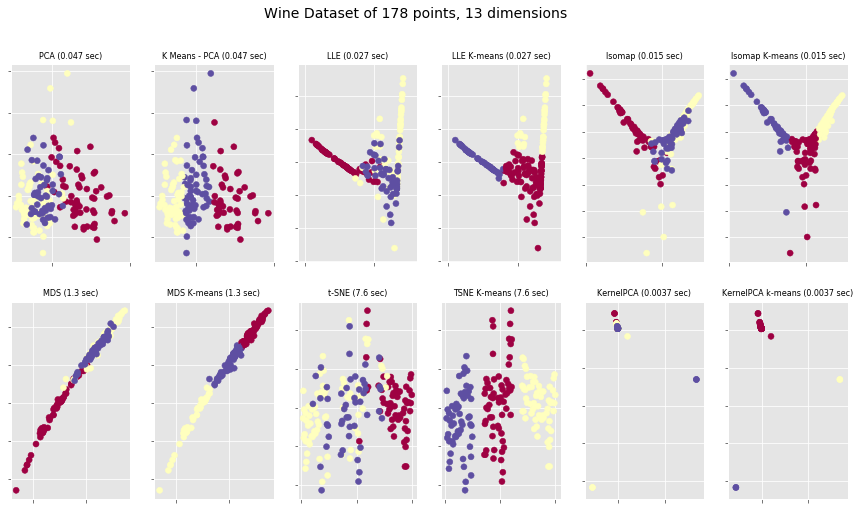

In [218]:
n_points = 1000
n_neighbors = 10
n_components = 2

#X, color = make_classification(100, 200, 2, 0, 0, 2, n_clusters_per_class=1, class_sep=2, random_state=777, shuffle=True)
#X, color =samples_generator.make_s_curve(1000, random_state=777)



#X[:, 1] -= 1
#X[:, 1] *= 1.5
#X[:, 2] *= 0.5



fig = plt.figure(figsize=(15, 8))
plt.suptitle("Wine Dataset of %i points, %i dimensions"
             % (178, 13), fontsize=14)



#methods = ['standard']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

t0 = time()
pca = PCA(2).fit(X)
Y = pca.transform(X)
i = KMeans(3).fit(Y)
t1 = time()
print("%s: %.2g sec" % ('PCA', t1 - t0))

ax = fig.add_subplot(261)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(262)
#plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('Accuracy kmeans PCA: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("K Means - PCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(X)
t1 = time()


ax = fig.add_subplot(263)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('LLE', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(264)
i = KMeans(3).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('LLE kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('LLE K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(265)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(266)
i = KMeans(3).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('Isomap kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('Isomap K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=5000, n_init=4)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(267)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(268)
i = KMeans(3).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('MDS kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('MDS K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
tsne = manifold.TSNE(n_components=n_components, n_iter=5000, init='pca', perplexity=10, random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 6, 9)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(2, 6, 10)
i = KMeans(3).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('t-SNE kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('TSNE K-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
kpca = KernelPCA(n_components=n_components, kernel='rbf', random_state=0)
Y = kpca.fit_transform(X)
t1 = time()
print("KernelPCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 6, 11)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("KernelPCA (%.2g sec)" % (t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


ax = fig.add_subplot(2, 6, 12)
i = KMeans(3).fit(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=i.labels_, cmap=plt.cm.Spectral)
print('KernelPCA kmeans: ' + str(max(1-(np.sum(i.labels_==color)/len(color)),(np.sum(i.labels_==color)/len(color)))))
plt.title("%s (%.2g sec)" % ('KernelPCA k-means', t1 - t0), fontsize=8)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [118]:
t = [TSNE(2, perplexity=i, random_state=777) for i in range(1,100,10)]

In [119]:
results = [i.fit_transform(X) for i in t]

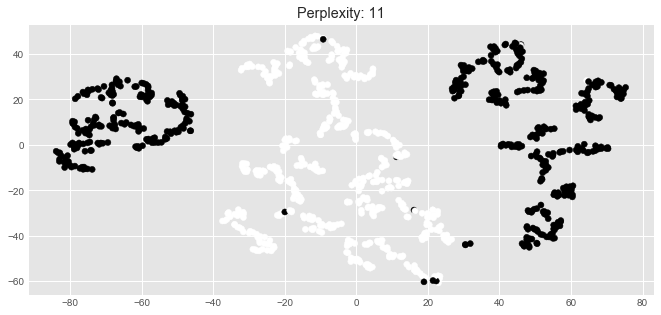

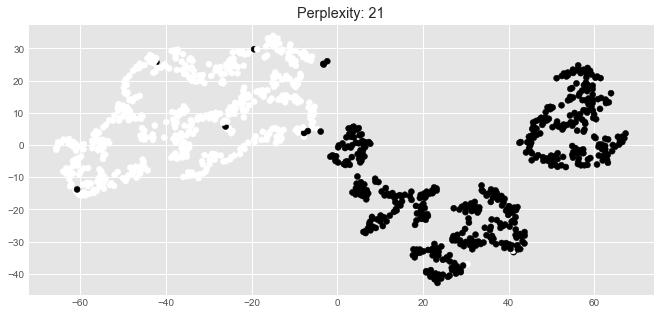

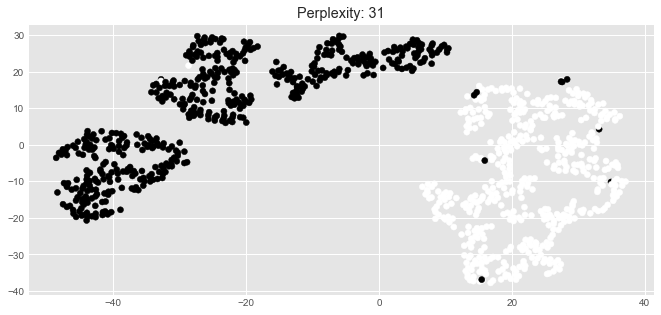

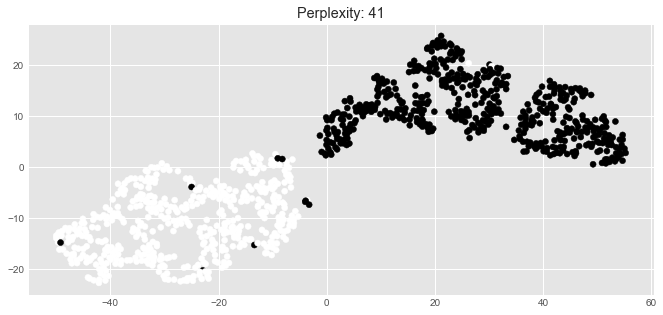

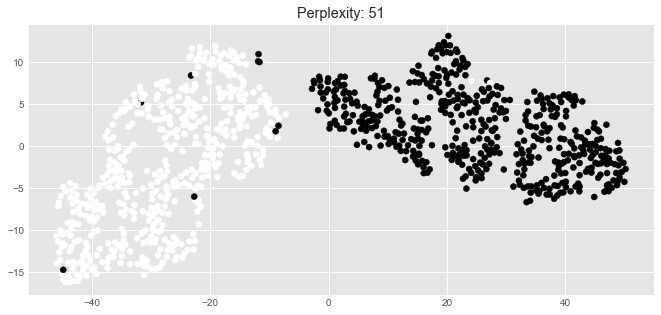

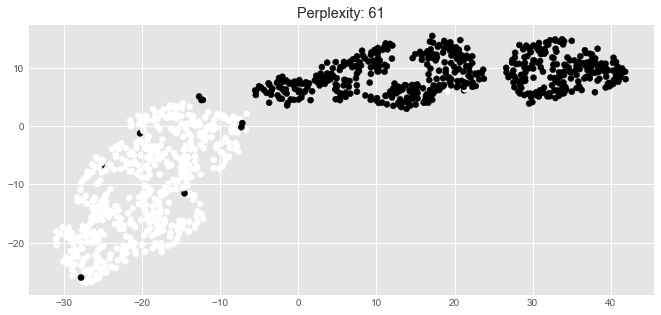

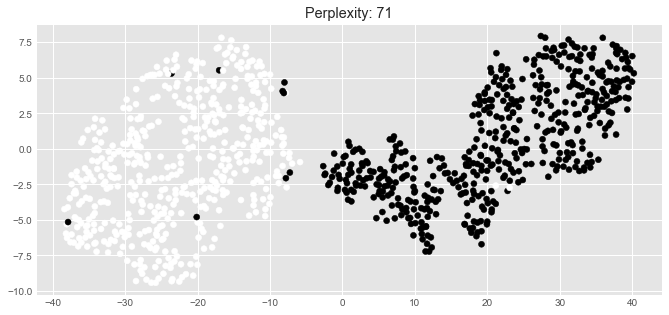

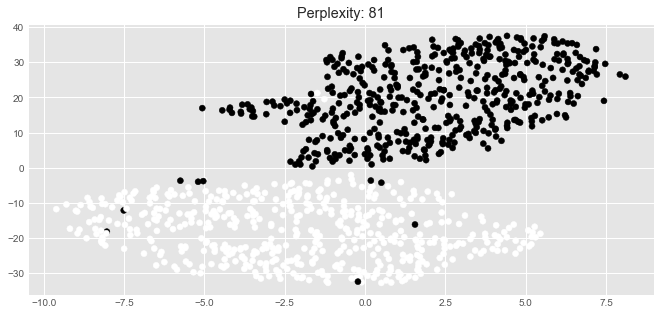

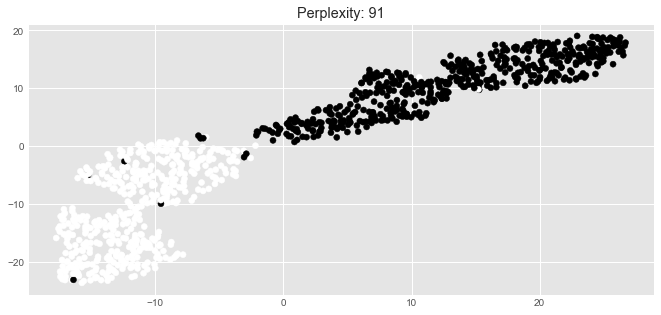

In [120]:
for i in range(1,len(results)):
    plt.figure(figsize=(10,5))
    plt.title('Perplexity: {:s}'.format(str(t[i].get_params()['perplexity'])))
    plt.scatter(results[i][:,0],results[i][:,1],c=y)

In [ ]:
m = [MDS()]